Data sorurce: https://covid.ourworldindata.org/data/owid-covid-data.csv

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
#Importing data:
df = pd.read_csv(r'https://covid.ourworldindata.org/data/owid-covid-data.csv')

#quick look to the data:
print(df)
df.head()
df.describe()

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
206610      ZWE    Africa     Zimbabwe  2022-08-01     256382.0        4.0   
206611      ZWE    Africa     Zimbabwe  2022-08-02     256403.0       21.0   
206612      ZWE    Africa     Zimbabwe  2022-08-03     256423.0       20.0   
206613      ZWE    Africa     Zimbabwe  2022-08-04     256444.0       21.0   
206614      ZWE    Africa     Zimbabwe  2022-08-05     256444.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [43]:
#Cleaning data

#Filtring data for United Kingdom, Sweden, Australia:
data=df[(df['location'] == 'United Kingdom') | (df['location'] == 'Sweden') | (df['location'] == 'Australia')]


In [60]:
#Time:
#All:
print(data['date'].min())
print(data['date'].max())

# We have data since 2020-01-26 to 2022-08-05

#UK
print(data[(data['location'] == 'United Kingdom')]['date'].min())
print(data[(data['location'] == 'United Kingdom')]['date'].max())

#2020-01-31
#2022-08-05

#Sweden
print(data[(data['location'] == 'Sweden')]['date'].min())
print(data[(data['location'] == 'Sweden')]['date'].max())

#2020-02-01
#2022-08-05

#Australia
print(data[(data['location'] == 'Australia')]['date'].min())
print(data[(data['location'] == 'Australia')]['date'].max())

#2020-01-26
#2022-08-05


#So, if we want to compare data, we should look at the sime period of time: 2020-02-1 - 2022-08-05

2020-01-26
2022-08-05
2020-01-31
2022-08-05
2020-02-01
2022-08-05
2020-01-26
2022-08-05


In [62]:
#Filtring data for period of time: 2020-02-01 - 2022-07-31
data=data[(data['date']>= '2020-02-01') & (data['date'] <='2022-07-31')]

In [63]:
#Creating a CSV file:
data.to_csv('data.csv',index=None, header=True)


In [82]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.736000e+03,2730.000000,2721.000000,2635.000000,2621.000000,2606.000000,2736.000000,2730.00000,2721.000000,2635.000000,...,2736.000000,2736.000000,0.0,2736.000000,2736.000000,2736.000000,374.000000,374.000000,374.000000,374.000000
mean,3.216438e+06,12659.653846,12593.195561,40431.975332,80.581076,80.624338,84082.928162,345.43713,343.318235,936.030349,...,17.266667,20.033333,NaN,2.866667,82.520000,0.940333,33893.821658,5.710080,5.818904,696.672413
std,5.643589e+06,25561.141648,22993.681919,57025.602678,192.127937,173.504576,103750.416443,754.02073,603.640523,844.876222,...,3.057064,3.442851,NaN,0.700668,0.888006,0.005908,48942.861202,5.964253,14.202581,699.606946
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.030000,0.00000,0.000000,0.015000,...,13.000000,16.500000,NaN,2.220000,81.320000,0.932000,-6099.500000,-5.590000,-19.200000,-150.001414
25%,3.079125e+04,10.000000,247.429000,1541.500000,0.000000,3.464500,1268.339750,0.38600,13.434000,63.365500,...,13.000000,16.500000,NaN,2.220000,81.320000,0.932000,-230.550000,-0.215000,-2.305000,-8.894302
50%,7.040330e+05,903.000000,1535.143000,13621.000000,10.000000,17.500000,37361.036500,38.57900,68.432000,617.187000,...,18.800000,18.900000,NaN,2.540000,82.800000,0.944000,8270.100000,5.610000,2.790000,785.499552
75%,3.802841e+06,14102.750000,16295.143000,42840.500000,63.000000,70.928500,119506.392000,390.50775,422.276000,1737.731000,...,20.000000,24.700000,NaN,3.840000,83.440000,0.945000,58058.575000,10.587500,9.735000,1026.584255
max,2.339241e+07,225992.000000,182908.143000,184140.000000,1820.000000,1248.714000,364021.704000,13278.27600,4213.354000,2736.878000,...,20.000000,24.700000,NaN,3.840000,83.440000,0.945000,146188.100000,20.590000,107.250000,2172.797864


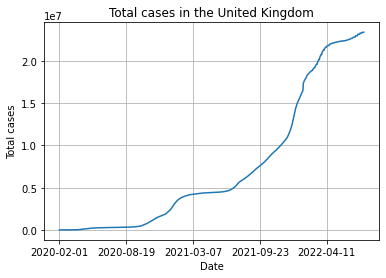

In [64]:
data[(data['location'] == 'United Kingdom')].plot(
x='date',
y='total_cases',
grid=True,
title="Total cases in the United Kingdom",
xlabel='Date',
ylabel='Total cases',
legend=False)
plt.show()

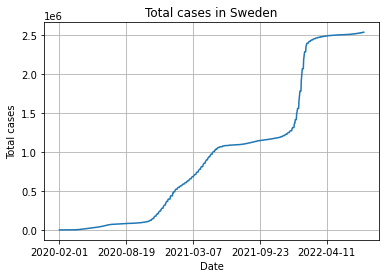

In [74]:
data[(data['location'] == 'Sweden')].plot(
x='date',
y='total_cases',
grid=True,
title="Total cases in Sweden",
xlabel='Date',
ylabel='Total cases',
legend=False)
plt.show()

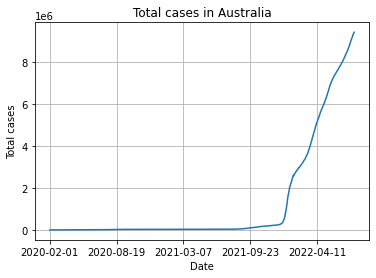

In [75]:
data[(data['location'] == 'Australia')].plot(
x='date',
y='total_cases',
grid=True,
title="Total cases in Australia",
xlabel='Date',
ylabel='Total cases',
legend=False)
plt.show()

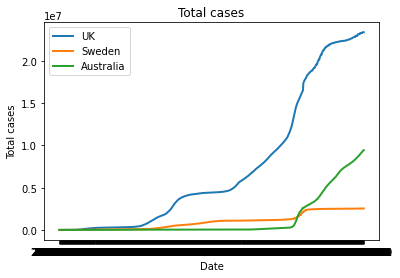

In [76]:
#Combine:
DateList  = data[(data['location'] == 'United Kingdom')]['date'].tolist()
total_cases_UK_list  = data[(data['location'] == 'United Kingdom')]['total_cases'].tolist()
total_cases_Sweden_list  = data[(data['location'] == 'Sweden')]['total_cases'].tolist()
total_cases_Australia_list  = data[(data['location'] == 'Australia')]['total_cases'].tolist()

plt.plot(DateList, total_cases_UK_list, label = 'UK', linewidth=2)
plt.plot(DateList, total_cases_Sweden_list, label = 'Sweden', linewidth=2)
plt.plot(DateList, total_cases_Australia_list, label = 'Australia', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Total cases')
plt.legend(loc='upper left')
plt.xticks(DateList)
plt.title('Total cases')
plt.show()

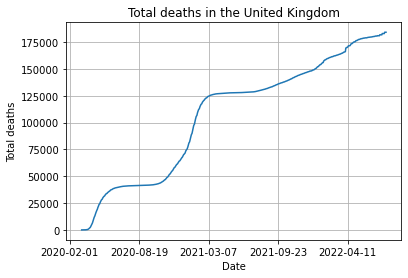

In [78]:
data[(data['location'] == 'United Kingdom')].plot(
x='date',
y='total_deaths',
grid=True,
title="Total deaths in the United Kingdom",
xlabel='Date',
ylabel='Total deaths',
legend=False)
plt.show()

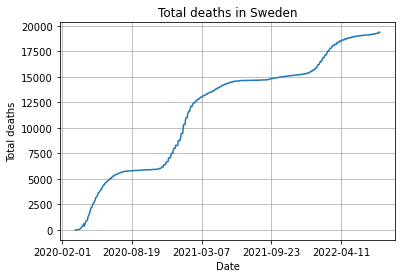

In [79]:
data[(data['location'] == 'Sweden')].plot(
x='date',
y='total_deaths',
grid=True,
title="Total deaths in Sweden",
xlabel='Date',
ylabel='Total deaths',
legend=False)
plt.show()

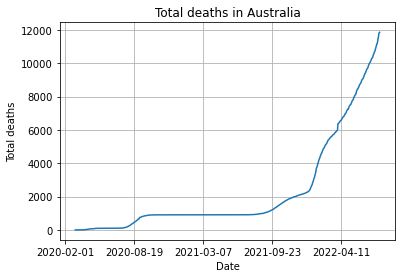

In [80]:
data[(data['location'] == 'Australia')].plot(
x='date',
y='total_deaths',
grid=True,
title="Total deaths in Australia",
xlabel='Date',
ylabel='Total deaths',
legend=False)
plt.show()

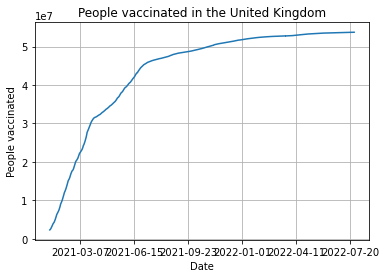

In [84]:
data[(data['location'] == 'United Kingdom')].plot(
x='date',
y='people_vaccinated',
grid=True,
title="People vaccinated in the United Kingdom",
xlabel='Date',
ylabel='People vaccinated',
legend=False)
plt.show()

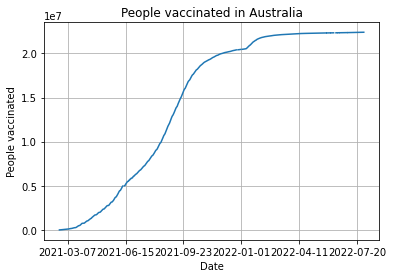

In [86]:
data[(data['location'] == 'Australia')].plot(
x='date',
y='people_vaccinated',
grid=True,
title="People vaccinated in Australia",
xlabel='Date',
ylabel='People vaccinated',
legend=False)
plt.show()

For Sweden it doesn't work - why? data once at week